In [3]:
#Basic Libraries
import numpy as np
import pandas as pd
import os
import io
 
#Importing warnings
import warnings

warnings.filterwarnings('ignore')
 
#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
#Data Pre-Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
 
# ML Algorithms
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

#Importing error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score
 
#Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [4]:
#Upload files in google drive
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [5]:
#Checking whether the files are in the drive
for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(
      name =fn))

User uploaded file "test.csv"
User uploaded file "train.csv"


In [6]:
#Checking shape of our dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Shape of train:",train.shape)
print("Shape of test:",test.shape)

Shape of train: (1168, 81)
Shape of test: (292, 80)


In [7]:
#For seeing all features 
pd.set_option("display.max_columns",2000)
pd.set_option("display.max_rows",85)

In [8]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [9]:
#Checking information of dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

### Observation:
          
          1. We see that here values are of mixed datatypes i.e. int64,float64 as well as object.
          2. Null values are present.

### Handling Missing Data

In [10]:
#Missing value counts in each column 
count=(train.isnull().sum()/len(train)) *100

#filter to find missing count >0
count= count[count > 0]
print(count.sort_values())

MasVnrType       0.599315
MasVnrArea       0.599315
BsmtQual         2.568493
BsmtCond         2.568493
BsmtFinType1     2.568493
BsmtFinType2     2.654110
BsmtExposure     2.654110
GarageCond       5.479452
GarageQual       5.479452
GarageFinish     5.479452
GarageType       5.479452
GarageYrBlt      5.479452
LotFrontage     18.321918
FireplaceQu     47.174658
Fence           79.708904
Alley           93.407534
MiscFeature     96.232877
PoolQC          99.400685
dtype: float64


Text(0.5, 1.0, 'Percent missing data by feature')

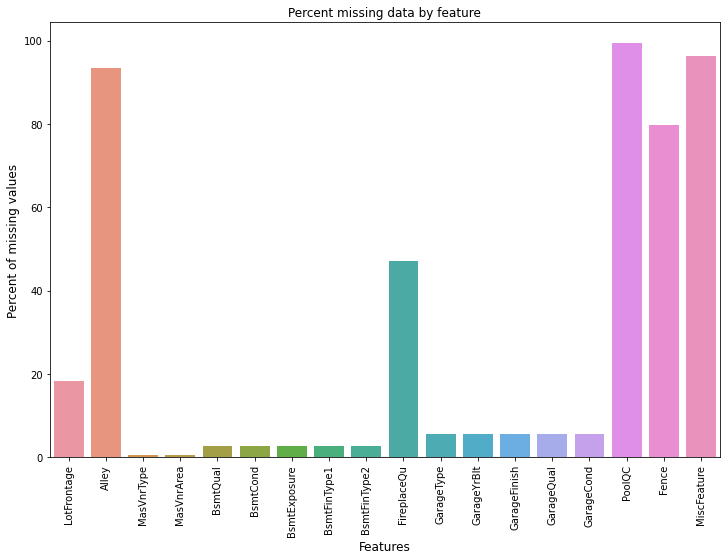

In [11]:
#Checking missing values with the help of barplot(for better understanding)
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=count.index, y=count)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percent of missing values', fontsize=12)
plt.title('Percent missing data by feature', fontsize=12)

In [12]:
# Removing columns having more than 30% missing values
train = train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)

### Observations:
1. As most of features are not very important when we think of buying a house as well as it also contains outliers so dropping them is a better option.


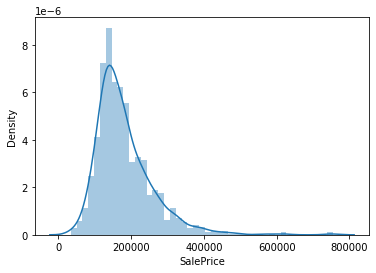

In [13]:
#Checking target variable i.e. 'SalePrice'
sns.distplot(train['SalePrice'])

### Obseravtion:
        
    1. We know that machine learning algorithms works well when data  are normally distributed but here it shows 'peakedness',positive 
    skewness i.e. target variable('SalePrice') is not normally distributed.

    2. Therefore,we can handle it  by taking log transform.

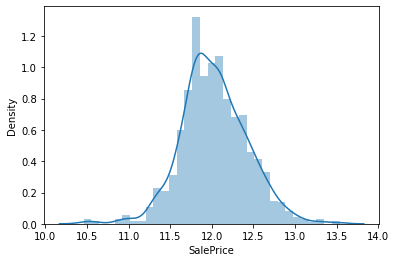

In [14]:
#Taking Log transform
target = np.log(train['SalePrice'])
sns.distplot(target)

### Observation:
    
    1. Now our target variable('SalePrice') is normally distributed. 

## Checking for numerical and categorical features

In [15]:
#Finding numerical features
num_data = train.select_dtypes(include = [np.number])

#Finding categorical features
cat_data = train.select_dtypes(exclude = [np.number])

#Printing numerical and categorical  features
print('There are {0} numerical and {1} categorical features'.\
      format(num_data.shape[1],cat_data.shape[1]))

There are 38 numerical and 38 categorical features


In [16]:
#Removing ID column as it is of no use
del num_data['Id']
num_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

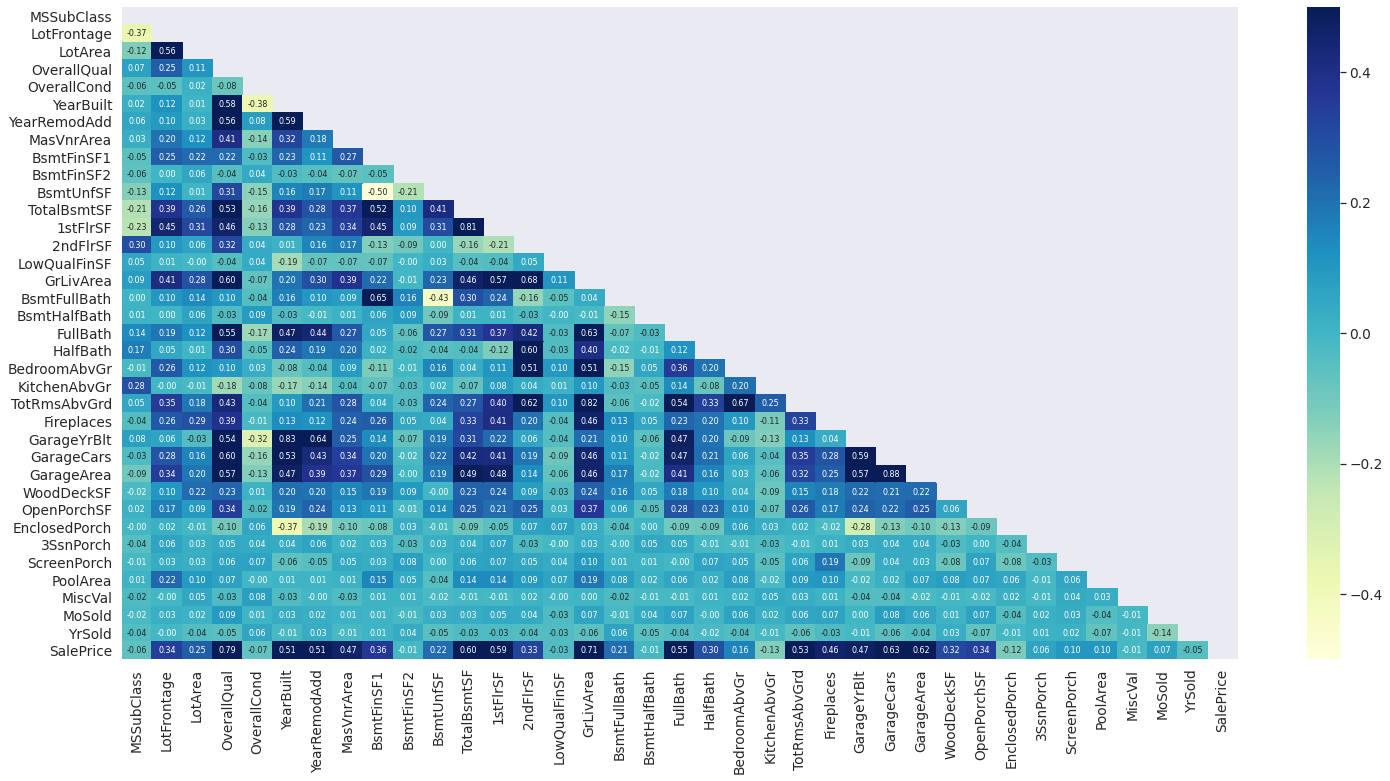

In [34]:
#plotting heatmap to find corelation between variables
corr = num_data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25,12))
sns.heatmap(corr, mask=mask, fmt='.2f', annot_kws={'size': 8}, cmap="YlGnBu",vmax=0.5,annot=True)


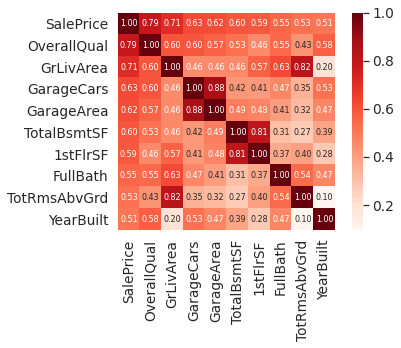

In [33]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True,square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values,cmap='Reds')
plt.show()

### Observations:
1. We observed that the correlation between 'TotalBsmtSF','1stFlrSF' and 'GarageX' variables is so strong that it can indicate a situation of multicollinearity.


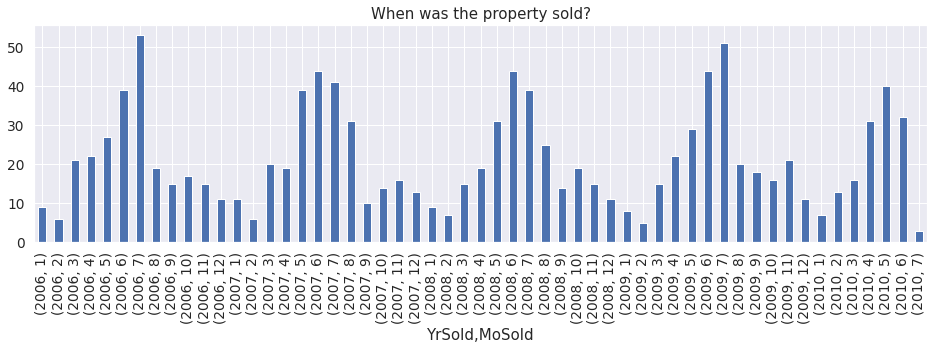

In [35]:
#Checking property sold year and month with the help of visualisation
train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar',figsize=(16,4))
plt.title('When was the property sold?')
plt.show()

### Observation:
    
    1. From above,it is observed that mostly in the month of 'June' and 'July' more number of properties are sold in all the years.

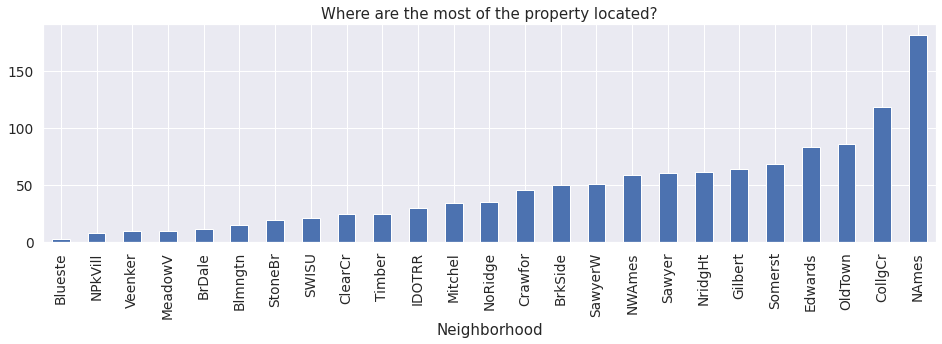

In [36]:
#Checking property location
train.groupby(['Neighborhood']).Id.count().\
sort_values().\
plot(kind='bar',figsize=(16,4))
plt.title('Where are the most of the property located?')
plt.show()

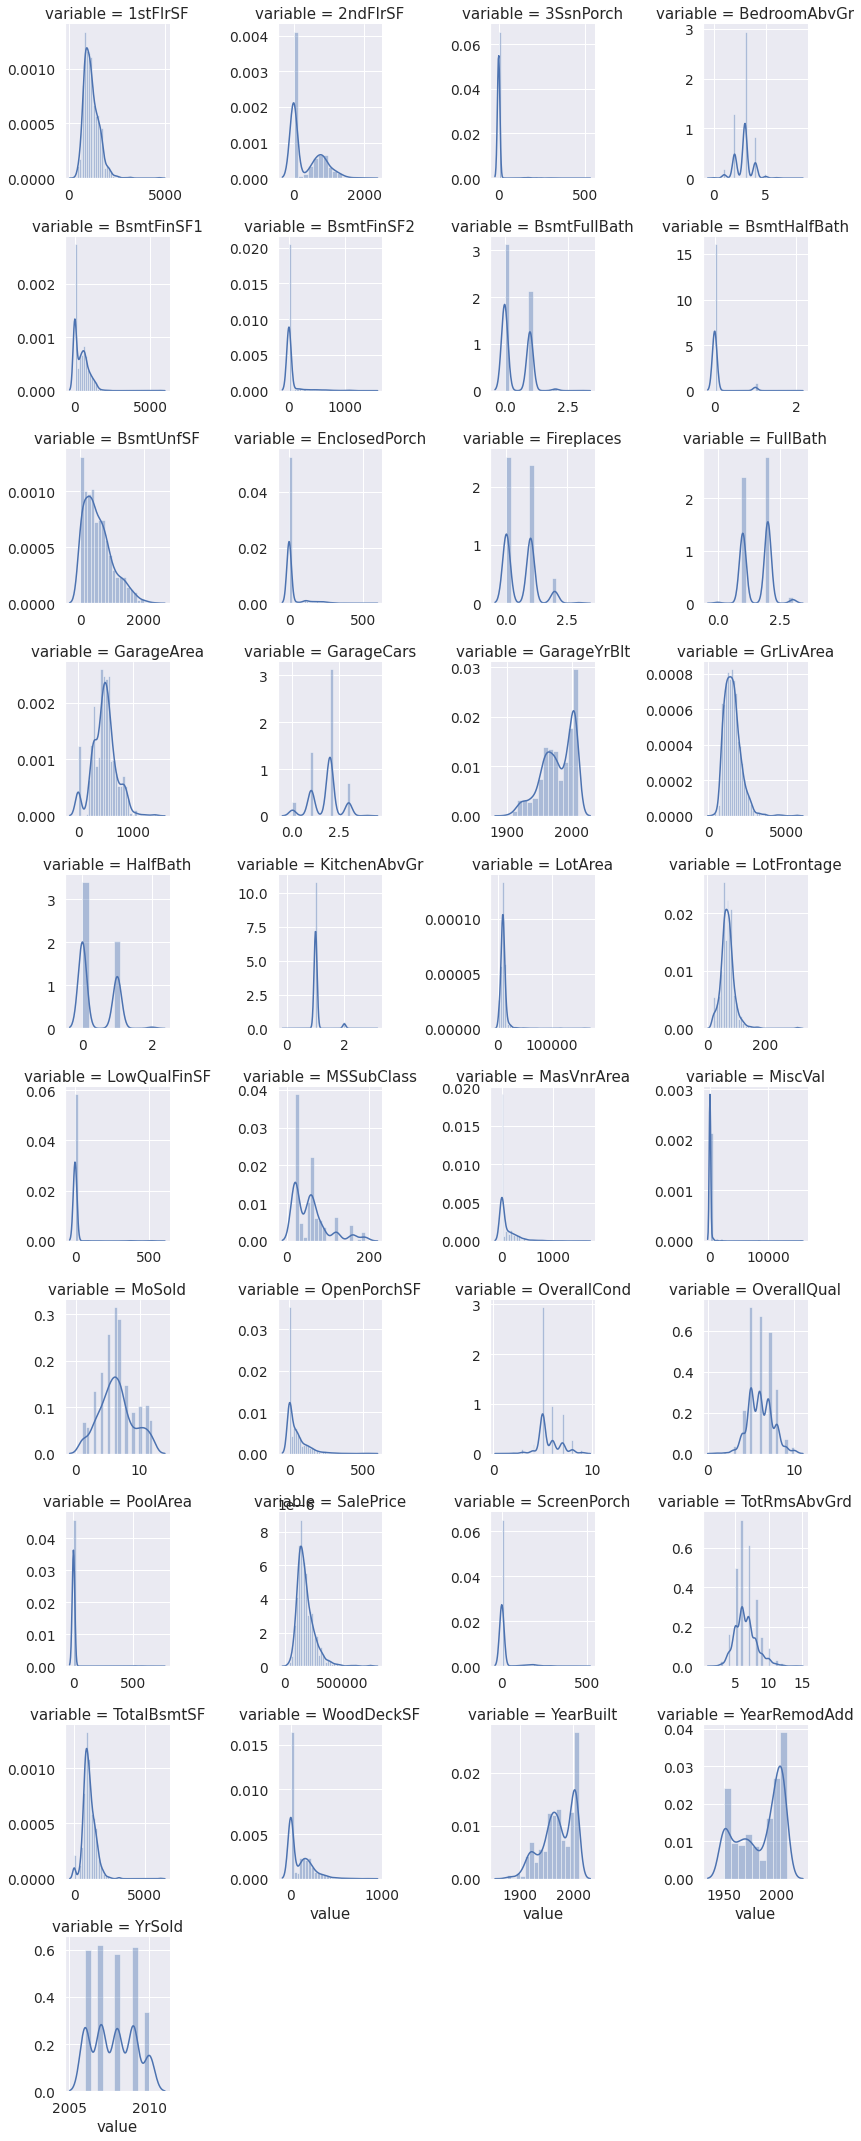

In [37]:
#Distribution of numerical features

f=pd.melt(train,value_vars=sorted(num_data))
g= sns.FacetGrid(f, col='variable',col_wrap=4,sharex=False,sharey=False)
g=g.map(sns.distplot, 'value')

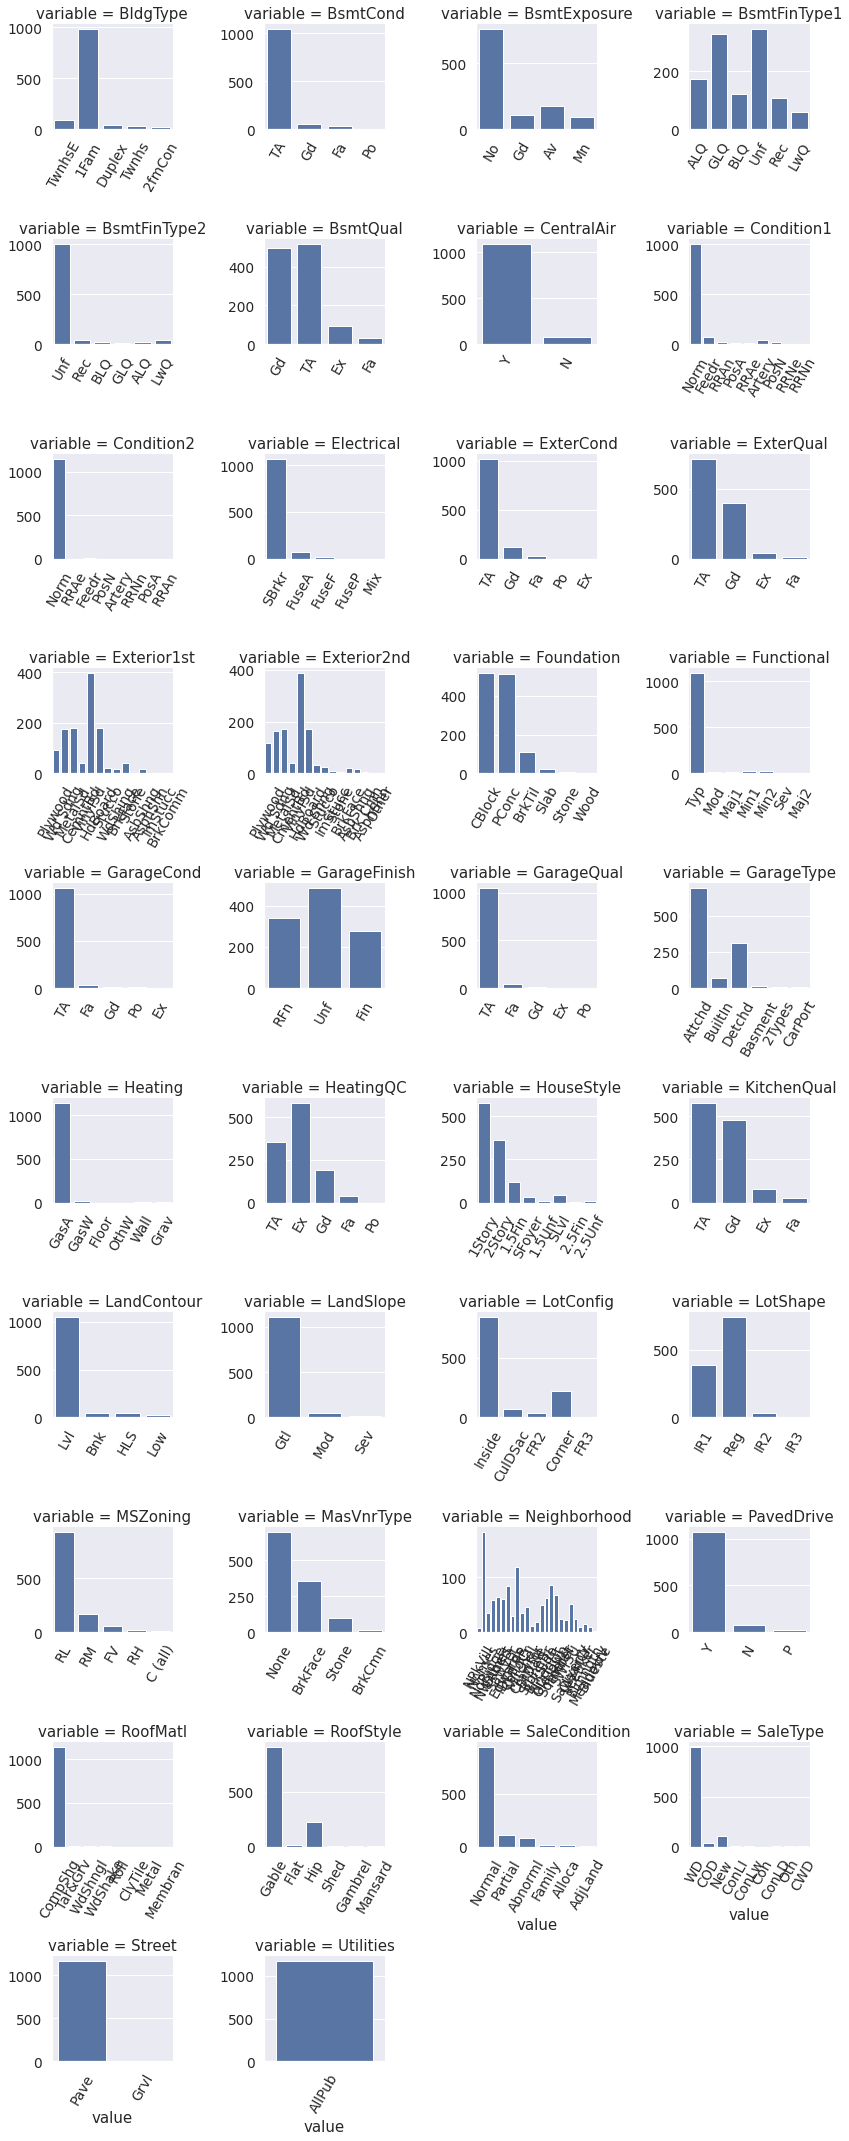

In [38]:
#Count of categorical features

f=pd.melt(train,value_vars=sorted(cat_data))
g= sns.FacetGrid(f, col='variable',col_wrap=4,sharex=False,sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


In [39]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
train.LotFrontage = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [40]:
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')

In [41]:
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)

In [42]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)

In [43]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 :For all basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')

In [44]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

In [45]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

In [46]:
#Utilities : For this categorical feature all records are "AllPub",except for one "NoSeWa" and 2 NA. 
#Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
train = train.drop(['Utilities'], axis=1)

In [47]:
#Functional : data description says NA means typical
train["Functional"] = train["Functional"].fillna("Typ")

In [48]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
train.loc[train.Electrical == 'Missing','Electrical'] = train.Electrical.mode()[0]

In [49]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

In [50]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

In [51]:
#SaleType : Fill in again with most frequent which is "WD"
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])

In [52]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None
train['MSSubClass'] = train['MSSubClass'].fillna("None")

In [53]:
 train.isnull().sum().max()

0

### Observation:
     
    1. No null values are present , all are handled carefully by replacing or filling it by mean,median and mode of feature respectively.

#### Transforming some numerical variables that are really categorical

In [54]:

#Converting from numeric feature to category features
train['MSSubClass']=train.MSSubClass.apply(lambda x: str(x))
train['MoSold']=train.MoSold.apply(lambda x: str(x))
train['YrSold']=train.YrSold.apply(lambda x: str(x))

In [55]:
#Finding numerical features
num_data = train.select_dtypes(include = [np.number])

#Finding categorical features
cat_data = train.select_dtypes(exclude = [np.number])

#Printing numerical and categorical  features
print('There are {0} numerical and {1} categorical features'.\
      format(num_data.shape[1],cat_data.shape[1]))

There are 35 numerical and 40 categorical features


### Checking Relationship with target variable('SalePrice'):

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'GrLivArea vs. SalePrice')

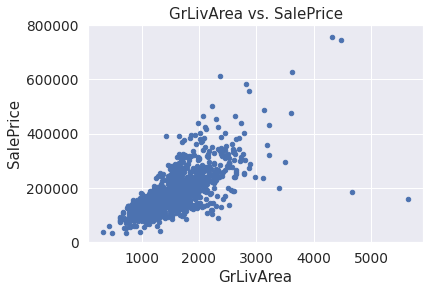

In [57]:
#Relationship with numerical variables:
 
#scatter plot grlivarea/saleprice

train.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('GrLivArea vs. SalePrice') 


### Observation:
    
    1. The two values with bigger 'GrLivArea' seem strange and they are not following the crowd.Therefore, we'll define them as outliers
     and delete them.

In [58]:
#Removing outliers:
train.drop(train[train.GrLivArea >= 4000].index,inplace=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'TotalBsmtSF vs. SalePrice')

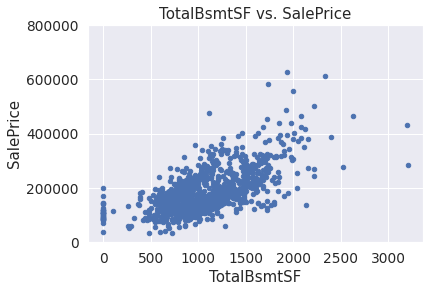

In [59]:
#scatter plot totalbsmtsf/saleprice
train.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));
plt.title('TotalBsmtSF vs. SalePrice')

### Observation:

1. 'GrLivArea' and 'TotalBsmtSF' seems to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. 

2. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

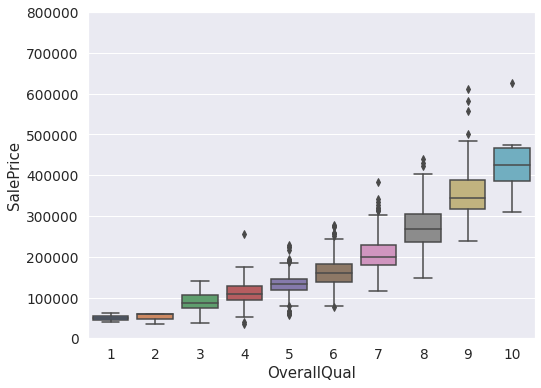

In [60]:
#Relationship with categorical features:

#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

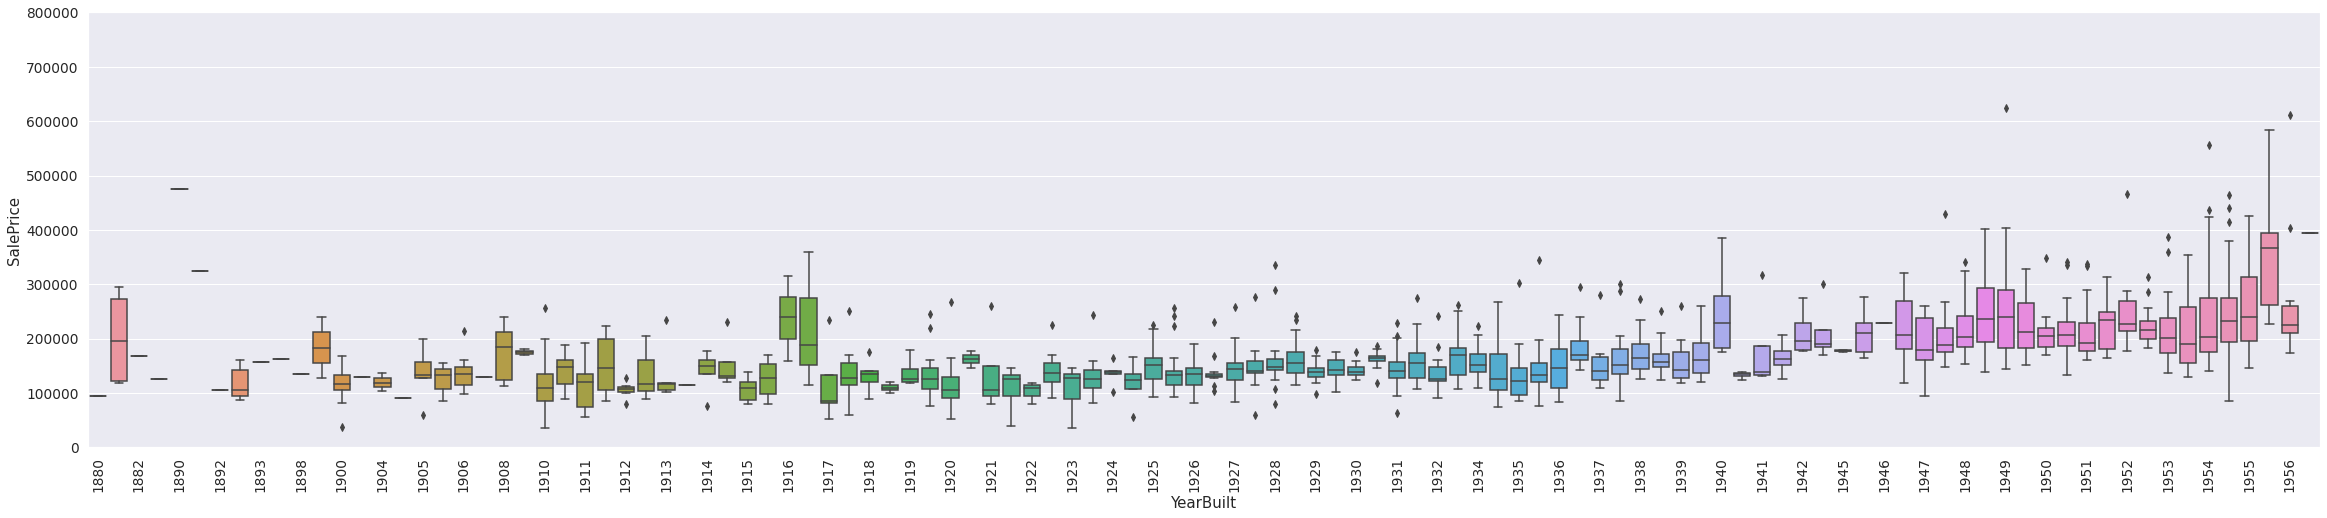

In [70]:
#box plot Yearbuilt/Saleprice
import matplotlib.ticker as ticker
f, ax = plt.subplots(figsize=(40,8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
#plt.set_xticklabels(rotation=30)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

### Observations:
1. 'OverallQual' and 'YearBuilt' also seems to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

In [71]:
numeric = train.dtypes[train.dtypes != "object"].index

# Checking skewness of all numerical features
skewed = train[numeric].skew().sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed})
skewness.head(15)


Skew in numerical features: 



,Skew
MiscVal,23.026520
PoolArea,15.652174
LotArea,11.140298
3SsnPorch,9.753414
LowQualFinSF,8.650744
BsmtFinSF2,4.357335
KitchenAbvGr,4.356655
BsmtHalfBath,4.299707
ScreenPorch,4.097554
EnclosedPorch,3.036898


In [72]:
#Treating skewness via box-cox transform.
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for i in skewed_features:
    train[i] = boxcox1p(train[i], lam)

There are 35 skewed numerical features to Box Cox transform


In [73]:
#Get dummies one-hot encoding method:
model_data=pd.get_dummies(train).copy()

In [74]:
model_data.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None

## Model Building:

In [75]:
#Seprate the input and output variable
df_x=model_data.drop(columns=["SalePrice"])
y=model_data[["SalePrice"]]

In [76]:
#Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(df_x)
df_x=pd.DataFrame(x,columns=df_x.columns)

In [77]:
#Breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.30,random_state=42)

In [78]:
#Checking shape of train dataset
print(x_train.shape)

(814, 304)


In [79]:
#All Algorithms by using for loop
 
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),
       Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]
model_tab=["LinearRegression()","SVR()","DecisionTreeRegressor()","KNeighborsRegressor","Lasso()",
       "Ridge()","ElasticNet()","RandomForestRegressor()","AdaBoostRegressor()"]
Score_tab =[]
RMSE_tab=[]
R2_tab=[]
 
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    Score_tab.append(score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    RMSE_tab.append(np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 score:',r2_score(y_test,predm))
    R2_tab.append(r2_score(y_test,predm))
    print('*'*100)
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.9612404591696294
MAE: 455353730096.50806
MSE: 1.9269176137813494e+25
RMSE: 4389666973451.801
R2 score: -3.0569897566906646e+24
****************************************************************************************************


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.8557424835057059
MAE: 0.8274678912587398
MSE: 1.5816067860814003
RMSE: 1.2576194917706232
R2 score: 0.7490834216479421
****************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
           

In [80]:
#Cross Validate All Algorithms by using loop
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),
       Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]
sd_tab=[]

for m in model:
    score=cross_val_score(m,df_x,y,cv=10,scoring='r2')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    sd_tab.append(score.std())
    print('*'*100)
    print('\n')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score: [-1.49712753e+20 -1.28732074e+22 -6.64948396e+20  9.13441317e-01
 -3.28032299e+18 -1.30058028e+21 -3.15111886e+21 -2.28907324e+25
 -8.30217659e+21 -4.84584835e+23]
Mean Score: -2.3401762269150442e+24
Standard deviation: 6.851689220223391e+24
****************************************************************************************************


Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Score: [0.70906333 0.76969965 0.82788155 0.76203154 0.773328   0.80226952
 0.70264216 0.7243842  0.77141457 0.65401423]
Mean Score: 0.7496728746322178
Standard deviation: 0.04911231403035308
****************************************************************************************************


Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features

In [81]:
#Storing the results in a dataframe
result=pd.DataFrame({'Model':model_tab,'Score':Score_tab,'RMSE':RMSE_tab,'R2 score':R2_tab,"Standard_deviation":sd_tab})
result_sort=result.sort_values(by='RMSE', ascending=True)
result_sort


,Model,Score,RMSE,R2 score,Standard_deviation
5,Ridge(),0.961234,8.716583e-01,8.794622e-01,2.337226e-02
7,RandomForestRegressor(),0.982253,9.634178e-01,8.527484e-01,3.159304e-02
8,AdaBoostRegressor(),0.894404,1.061483e+00,8.212456e-01,3.174719e-02
1,SVR(),0.855742,1.257619e+00,7.490834e-01,4.911231e-02
2,DecisionTreeRegressor(),1.000000,1.275623e+00,7.418480e-01,5.477353e-02
3,KNeighborsRegressor,0.816601,1.308679e+00,7.282954e-01,5.203981e-02
6,ElasticNet(),0.711881,1.437271e+00,6.722761e-01,4.140841e-02
4,Lasso(),0.528183,1.808765e+00,4.809668e-01,4.141191e-02
0,LinearRegression(),0.961240,4.389667e+12,-3.056990e+24,6.851689e+24


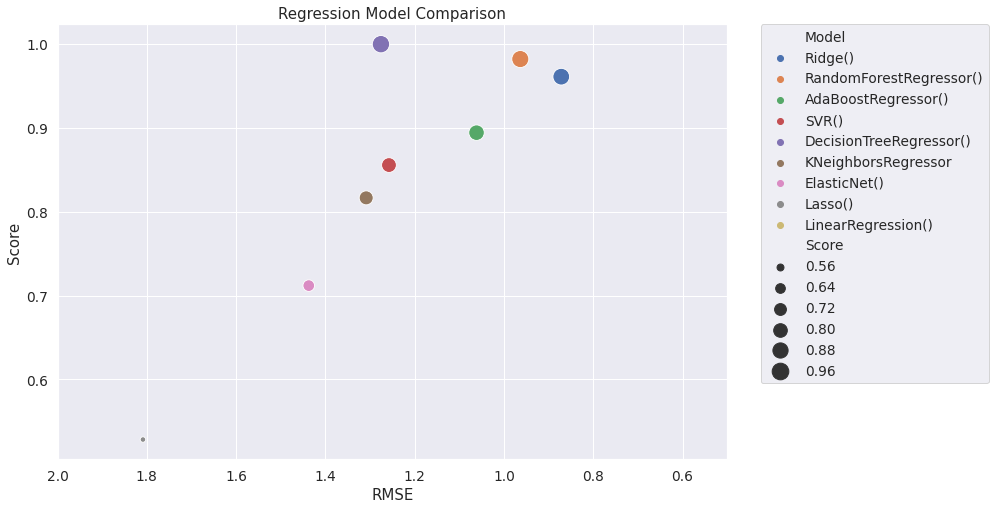

In [82]:
#Plotting result with the help of scatter plot
plt.figure(figsize=(12,8))
g = sns.scatterplot(data=result_sort,x="RMSE",y="Score",size='Score',hue="Model",sizes=(30,300),cmap="Blues").set(xlim=(2,0.5))
plt.title("Regression Model Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### What has been revealed:

   1. Two models i.e. 'Ridge Regressor' and 'Random Forest Regressor' are performing best having low RMSE as compared to others.

## Random Forest Regressor :

In [83]:
#Using GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[10,100,200] ,'max_depth':[4,5,10,15,20]}
rfr=RandomForestRegressor()

clf=GridSearchCV(rfr,parameters)
clf.fit(df_x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 200}


In [84]:
#Using Random Forest Regressor with its best parameter

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_predm=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_predm))
print('Mean squared error:',mean_squared_error(y_test,y_predm))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_predm)))
print('\n')
print('R2 score:',r2_score(y_test,y_predm))
print('\n')

Score: 0.9553646798759802


Mean absolute error: 0.6797371812393833
Mean squared error: 0.9860838437347619
Root Mean Squared Error: 0.9930175445251518


R2 score: 0.8435611264344705




## Ridge Regressor:

In [87]:
# Estimating best n_estimator using grid search for Ridge model
params={'alpha': [100,50,25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
rdg_reg = Ridge()
clf_r= GridSearchCV(rdg_reg,params,cv=2,verbose = 1, scoring = 'neg_mean_squared_error')
clf_r.fit(df_x,y)

print(clf_r.best_params_)


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 100}


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


In [88]:
#Using Ridge with its best parameter

rdg=Ridge(alpha=100)
rdg.fit(x_train,y_train)
print('Score:',rdg.score(x_train,y_train))
y_predm=rdg.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_predm))
print('Mean squared error:',mean_squared_error(y_test,y_predm))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_predm)))
print('\n')
print('R2 score:',r2_score(y_test,y_predm))
print('\n')

Score: 0.9547943034670602


Mean absolute error: 0.5660277445580336
Mean squared error: 0.6487731040021617
Root Mean Squared Error: 0.805464526842841


R2 score: 0.8970743367974598




For the visualization (Ridge coefficients as a function of the regularization):

Ridge picked 304 features and eliminated the other 0 features


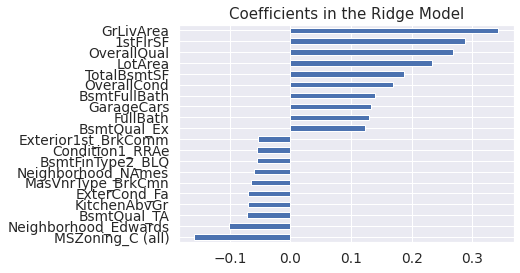

In [89]:
#Coefficients in Ridge Model
coefs = pd.Series((rdg.coef_).reshape([-1,]), index = df_x.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [90]:
#now applying Ridge regressor 
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.30,random_state=42)
rdg_new=Ridge(alpha=100)
rdg_new.fit(x_train,y_train)
predm=rdg_new.predict(x_test)

Text(0.5, 1.0, 'Prediction vs. Test Results')

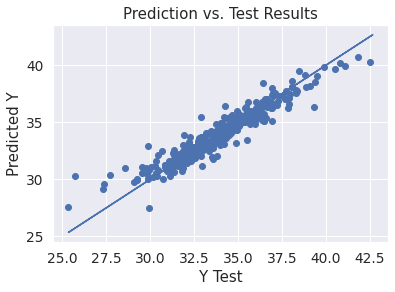

In [91]:
#Plotting our prediction vs test results
plt.scatter(x=y_test,y=predm)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(y,y)
plt.title('Prediction vs. Test Results')

#### Observation:

    1. We nearly have a straight line , which shows that prediction is good.

Text(0.5, 1.0, 'Predictions Distribution')

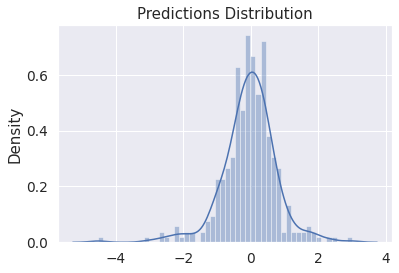

In [92]:
#Checking distribution of our predictions
predict=predm.reshape(-1,1)
sns.distplot((y_test-predict),bins=50)
plt.title('Predictions Distribution')

### Observation:

    1. Residuals looked to be normally distributed, which infers prediction is not skewed.

## I choose Ridge Regressor as our final model as their RMSE is low as compared to Random Forest Regressor and performs better .

In [123]:
#predicted values
df_predict = pd.DataFrame({'Y Test':y_test["SalePrice"] ,'Pred':predm.reshape(-1,)})
df_predict.head()

,Y Test,Pred
768,33.765669,33.426895
101,32.282458,32.299207
777,32.094213,31.768540
673,33.747323,33.411578
763,33.598827,33.042436


In [127]:
df_predict.to_csv('SalePrice_Predictions.csv',index=False)

## Saving the final model

In [128]:
import joblib
#save the model as a pickle in a file 
joblib.dump(rdg_new,'rdg_housing.pkl')

['rdg_housing.pkl']

### Conclusion:


a. Taken output variable as 'SalePrice'.

b. Found best model as Ridge Regressor which provides RMSE Score of 0.87.

c. Fine tuning done on the model and found best parameters (alpha=100) for the prediction.

d. Plotted scatter plot and found linear line that shows close match between test and predicted values.

e. Also plotted distplot that shows normal distribution of the predicted values. 

f. Also RMSE is found to be low, showing that model fitting is good. 
